In [1]:
from utils import *
from model_utils import *
from data import *
from c2d_models import *

# tensorflow-gpu 1.15.0

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
test_data = IR_DISTRACTION(isTrain = False, useAllTestData=False)

In [4]:
model = load_model("trained_models/C2D_AE_128_3x3_IR_DISTRACTION/model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
from lime import lime_image

In [6]:
explainer = lime_image.LimeImageExplainer()

In [7]:
class Scorer:
    def __init__(self, model, max_value):
        self.model = model
        self.predict = self.__call__
        self.max_value = max_value
    
    def __call__(self, inputs):
        reconstructions = self.model.predict(inputs)
        return np.expand_dims(np.sum((reconstructions-inputs)**2, axis = (-3,-2,-1)) / self.max_value, axis = 1)

In [8]:
model_scorer = Scorer(model, 400)

In [9]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_data.abnormal_data["text"][0].astype('double'), model_scorer.predict, num_features=32*32)


CPU times: user 2.08 s, sys: 280 ms, total: 2.36 s
Wall time: 2.31 s


In [10]:
from skimage.segmentation import mark_boundaries

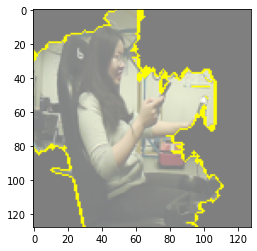

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))